<a href="https://colab.research.google.com/github/rraghu214/mnist_digit_recognition/blob/main/ERA_Session_4_Raghu_ref1_26KParams_97Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
kwargs_test = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs_test)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

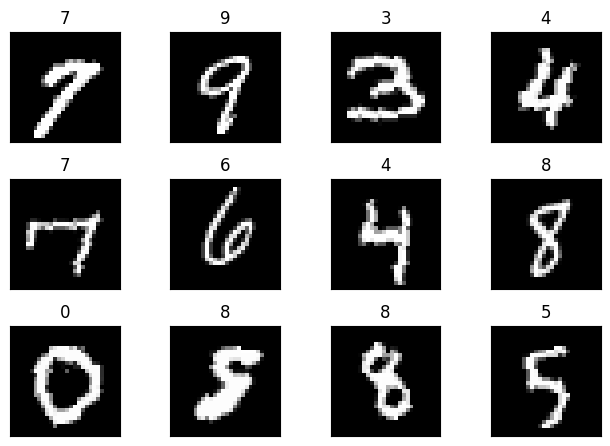

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])



CODE BLOCK: 7

In [7]:
# class Net(nn.Module):
#     #This defines the structure of the NN.
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
#         self.conv4 = nn.Conv2d(128, 256, kernel_size=3)
#         self.fc1 = nn.Linear(256*4*4, 50)
#         # self.fc1 = nn.Linear(128, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(self.conv1(x), 2)
#         x = F.relu(F.max_pool2d(self.conv2(x), 2))
#         x = F.relu(self.conv3(x), 2)
#         x = F.relu(F.max_pool2d(self.conv4(x), 2))
#         print(x.shape)
#         # x = x.view(-1, 320)
#         x = x.view(x.size(0), -1)  # flatten
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)

CODE BLOCK:7-A

In [8]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)   # 1 → 8
#         self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)  # 8 → 16
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(16*7*7, 10)  # after two poolings: 28→14→7

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))  # [batch, 8, 14, 14]
#         x = self.pool(F.relu(self.conv2(x)))  # [batch, 16, 7, 7]
#         x = torch.flatten(x, 1)               # [batch, 16*7*7]
#         x = self.fc1(x)                       # [batch, 10]
#         return F.log_softmax(x, dim=1)

Epoch 1
Train: Loss=223.2571 Batch_id=117 Accuracy=10.25: 100%|██████████| 118/118 [00:20<00:00,  5.85it/s]
Test set: Average loss: 2.3317, Accuracy: 5851/60000 (9.75%)

Epoch 2
Train: Loss=219.6511 Batch_id=117 Accuracy=10.16: 100%|██████████| 118/118 [00:17<00:00,  6.64it/s]
Test set: Average loss: 2.3535, Accuracy: 6742/60000 (11.24%)

Epoch 3
Train: Loss=221.7430 Batch_id=117 Accuracy=10.40: 100%|██████████| 118/118 [00:18<00:00,  6.31it/s]
Test set: Average loss: 2.3301, Accuracy: 5949/60000 (9.91%)

Epoch 4
Train: Loss=222.4325 Batch_id=117 Accuracy=10.20: 100%|██████████| 118/118 [00:18<00:00,  6.55it/s]
Test set: Average loss: 2.3282, Accuracy: 5923/60000 (9.87%)

Epoch 5
Train: Loss=224.0293 Batch_id=117 Accuracy=10.48: 100%|██████████| 118/118 [00:17<00:00,  6.59it/s]
Test set: Average loss: 2.3329, Accuracy: 6265/60000 (10.44%)

Epoch 6
Train: Loss=221.3869 Batch_id=117 Accuracy=10.48: 100%|██████████| 118/118 [00:18<00:00,  6.25it/s]
Test set: Average loss: 2.3103, Accuracy: 5923/60000 (9.87%)

Epoch 7
Train: Loss=223.7734 Batch_id=117 Accuracy=10.06: 100%|██████████| 118/118 [00:18<00:00,  6.44it/s]
Test set: Average loss: 2.3328, Accuracy: 5918/60000 (9.86%)

Epoch 8
Train: Loss=221.4380 Batch_id=117 Accuracy=10.44: 100%|██████████| 118/118 [00:17<00:00,  6.58it/s]
Test set: Average loss: 2.3331, Accuracy: 5918/60000 (9.86%)

Epoch 9
Train: Loss=218.2651 Batch_id=117 Accuracy=10.49: 100%|██████████| 118/118 [00:17<00:00,  6.57it/s]
Test set: Average loss: 2.3624, Accuracy: 5918/60000 (9.86%)

Epoch 10
Train: Loss=220.2719 Batch_id=117 Accuracy=10.25: 100%|██████████| 118/118 [00:18<00:00,  6.35it/s]
Test set: Average loss: 2.3333, Accuracy: 6742/60000 (11.24%)

CODE BLOCK:7-B

In [9]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # 1 → 16
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 16 → 32
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(32*7*7, 10)  # after two poolings: 28→14→7

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))  # [batch, 16, 14, 14]
#         x = self.pool(F.relu(self.conv2(x)))  # [batch, 32, 7, 7]
#         x = torch.flatten(x, 1)               # [batch, 64*7*7]
#         x = self.fc1(x)                       # [batch, 10]
#         return F.log_softmax(x, dim=1)

```
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # 1 → 16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 16 → 32
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*7*7, 10)  # after two poolings: 28→14→7

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [batch, 16, 14, 14]
        x = self.pool(F.relu(self.conv2(x)))  # [batch, 32, 7, 7]
        x = torch.flatten(x, 1)               # [batch, 64*7*7]
        x = self.fc1(x)                       # [batch, 10]
        return F.log_softmax(x, dim=1)
```
Epoch 1
Train: Loss=222.1362 Batch_id=117 Accuracy=10.14: 100%|██████████| 118/118 [00:17<00:00,  6.76it/s]
Test set: Average loss: 2.3690, Accuracy: 5958/60000 (9.93%)

CODE BLOCK-7C

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # 1 → 16
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 16 → 32
        self.conv1x1_1 = nn.Conv2d(32, 16, kernel_size=1)         # shrink channels

        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # back to 32
        self.conv1x1_2 = nn.Conv2d(32, 32, kernel_size=1)         # refine features

        self.fc1 = nn.Linear(32*7*7, 10)  # after 2 poolings: 28→14→7

    def forward(self, x):
        # First block
        x = self.pool(F.relu(self.conv1(x)))   # [batch, 16, 14, 14]

        # Second block
        x = self.pool(F.relu(self.conv2(x)))   # [batch, 32, 7, 7]
        x = F.relu(self.conv1x1_1(x))          # [batch, 16, 7, 7]

        # Third block
        x = F.relu(self.conv3(x))              # [batch, 32, 7, 7]
        x = F.relu(self.conv1x1_2(x))          # [batch, 32, 7, 7]

        # Flatten + FC
        x = torch.flatten(x, 1)                # [batch, 32*7*7]
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)

```
Requirement already satisfied: torchsummary in /usr/local/lib/python3.12/dist-packages (1.5.1)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           4,640
         MaxPool2d-4             [-1, 32, 7, 7]               0
            Conv2d-5             [-1, 16, 7, 7]             528
            Conv2d-6             [-1, 32, 7, 7]           4,640
            Conv2d-7             [-1, 32, 7, 7]           1,056
            Linear-8                   [-1, 10]          15,690
================================================================
Total params: 26,714
Trainable params: 26,714
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.21
Params size (MB): 0.10
Estimated Total Size (MB): 0.31
----------------------------------------------------------------
```

Epoch 1
Train: Loss=nan Batch_id=117 Accuracy=9.85: 100%|██████████| 118/118 [00:17<00:00,  6.76it/s]
Test set: Average loss: nan, Accuracy: 5923/60000 (9.87%)



CODE BLOCK: 8

In [11]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [12]:

from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer, criterion):
  model.train()
  pbar = tqdm(train_loader)

  train_loss = 0
  correct = 0
  processed = 0

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()

    # Predict
    pred = model(data)

    # Calculate loss
    loss = criterion(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()

    correct += GetCorrectPredCount(pred, target)
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            # test_loss += criterion(output, target, reduction='sum').item()  # sum up batch loss
            test_loss += criterion(output, target).item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


CODE BLOCK: 10

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
import torch
print(torch.__version__)

2.8.0+cu126


In [15]:
model = Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1 )
# New Line
# criterion = nn.CrossEntropyLoss(reduction='sum')
criterion = nn.CrossEntropyLoss()
num_epochs = 1

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  scheduler.step()

Epoch 1


Train: Loss=0.1452 Batch_id=937 Accuracy=91.75: 100%|██████████| 938/938 [00:23<00:00, 39.22it/s]


Test set: Average loss: 0.0015, Accuracy: 58214/60000 (97.02%)



Epoch 1
Train: Loss=0.5895 Batch_id=117 Accuracy=46.65: 100%|██████████| 118/118 [00:17<00:00,  6.63it/s]
Test set: Average loss: 0.0012, Accuracy: 49258/60000 (82.10%)

CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

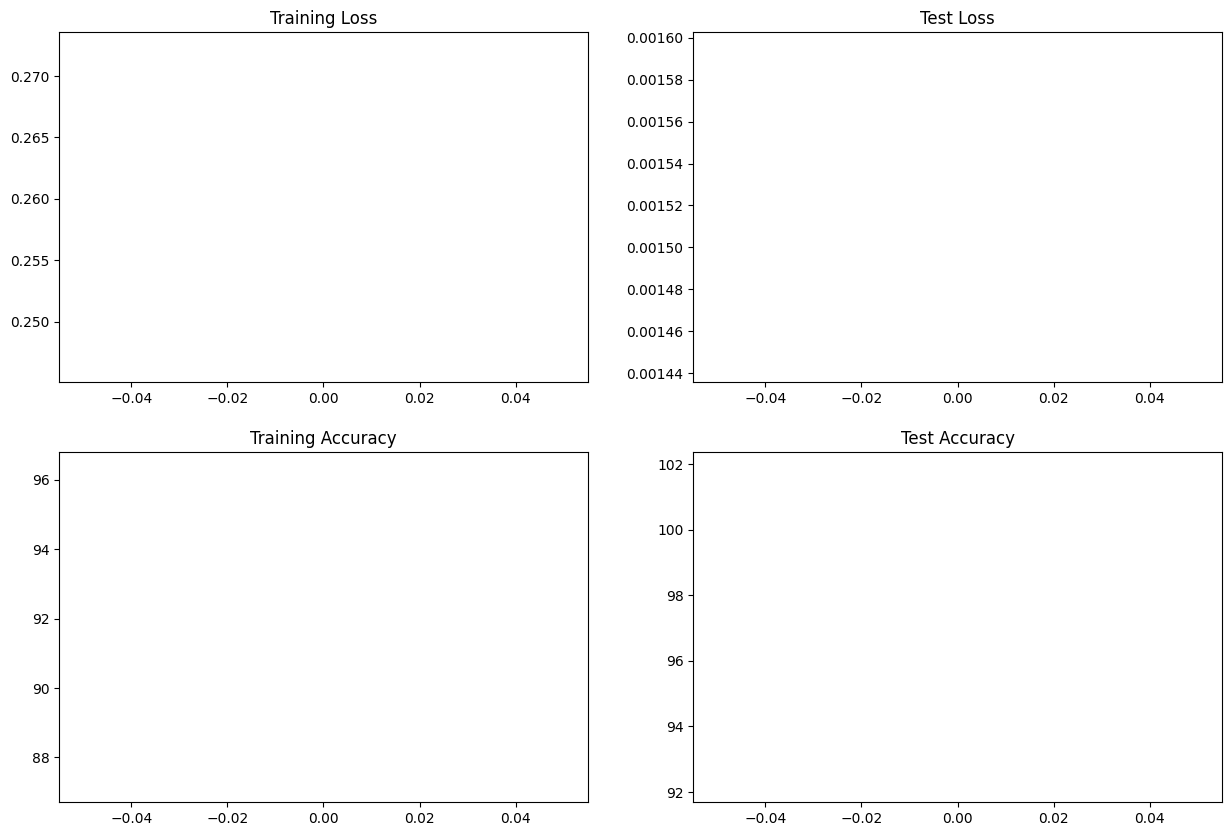

In [16]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [17]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           4,640
         MaxPool2d-4             [-1, 32, 7, 7]               0
            Conv2d-5             [-1, 16, 7, 7]             528
            Conv2d-6             [-1, 32, 7, 7]           4,640
            Conv2d-7             [-1, 32, 7, 7]           1,056
            Linear-8                   [-1, 10]          15,690
Total params: 26,714
Trainable params: 26,714
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.21
Params size (MB): 0.10
Estimated Total Size (MB): 0.31
----------------------------------------------------------------
